<a href="https://colab.research.google.com/github/ShakthiSree2004/lab-test/blob/main/labtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#question 1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression


In [2]:
#reading the dataset
data = pd.read_csv('parkinsons.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
#seperating the outcomes
data = data.drop(columns=['name'])
X = data.drop(columns=['status'])
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr = np.round(y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Linear Regression Accuracy: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))



Linear Regression Accuracy: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [9]:
#Perceptron Learning Algorithm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pla_model = Perceptron()
pla_model.fit(X_train_scaled, y_train)

y_pred_pla = pla_model.predict(X_test_scaled)


accuracy_pla = accuracy_score(y_test, y_pred_pla)
print(f"Perceptron Accuracy: {accuracy_pla}")
print(classification_report(y_test, y_pred_pla))

Perceptron Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [10]:
#multi layer perceptron

mlp_model = MLPClassifier()

mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")
print(classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
#K-Nearest Neighbours
knn_model = KNeighborsClassifier()


knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [12]:
#Support Vector Machine
svm_model = SVC()


svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [13]:
# Naive Bayes
nb_model = GaussianNB()


nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       0.92      0.69      0.79        32

    accuracy                           0.69        39
   macro avg       0.62      0.70      0.62        39
weighted avg       0.81      0.69      0.73        39



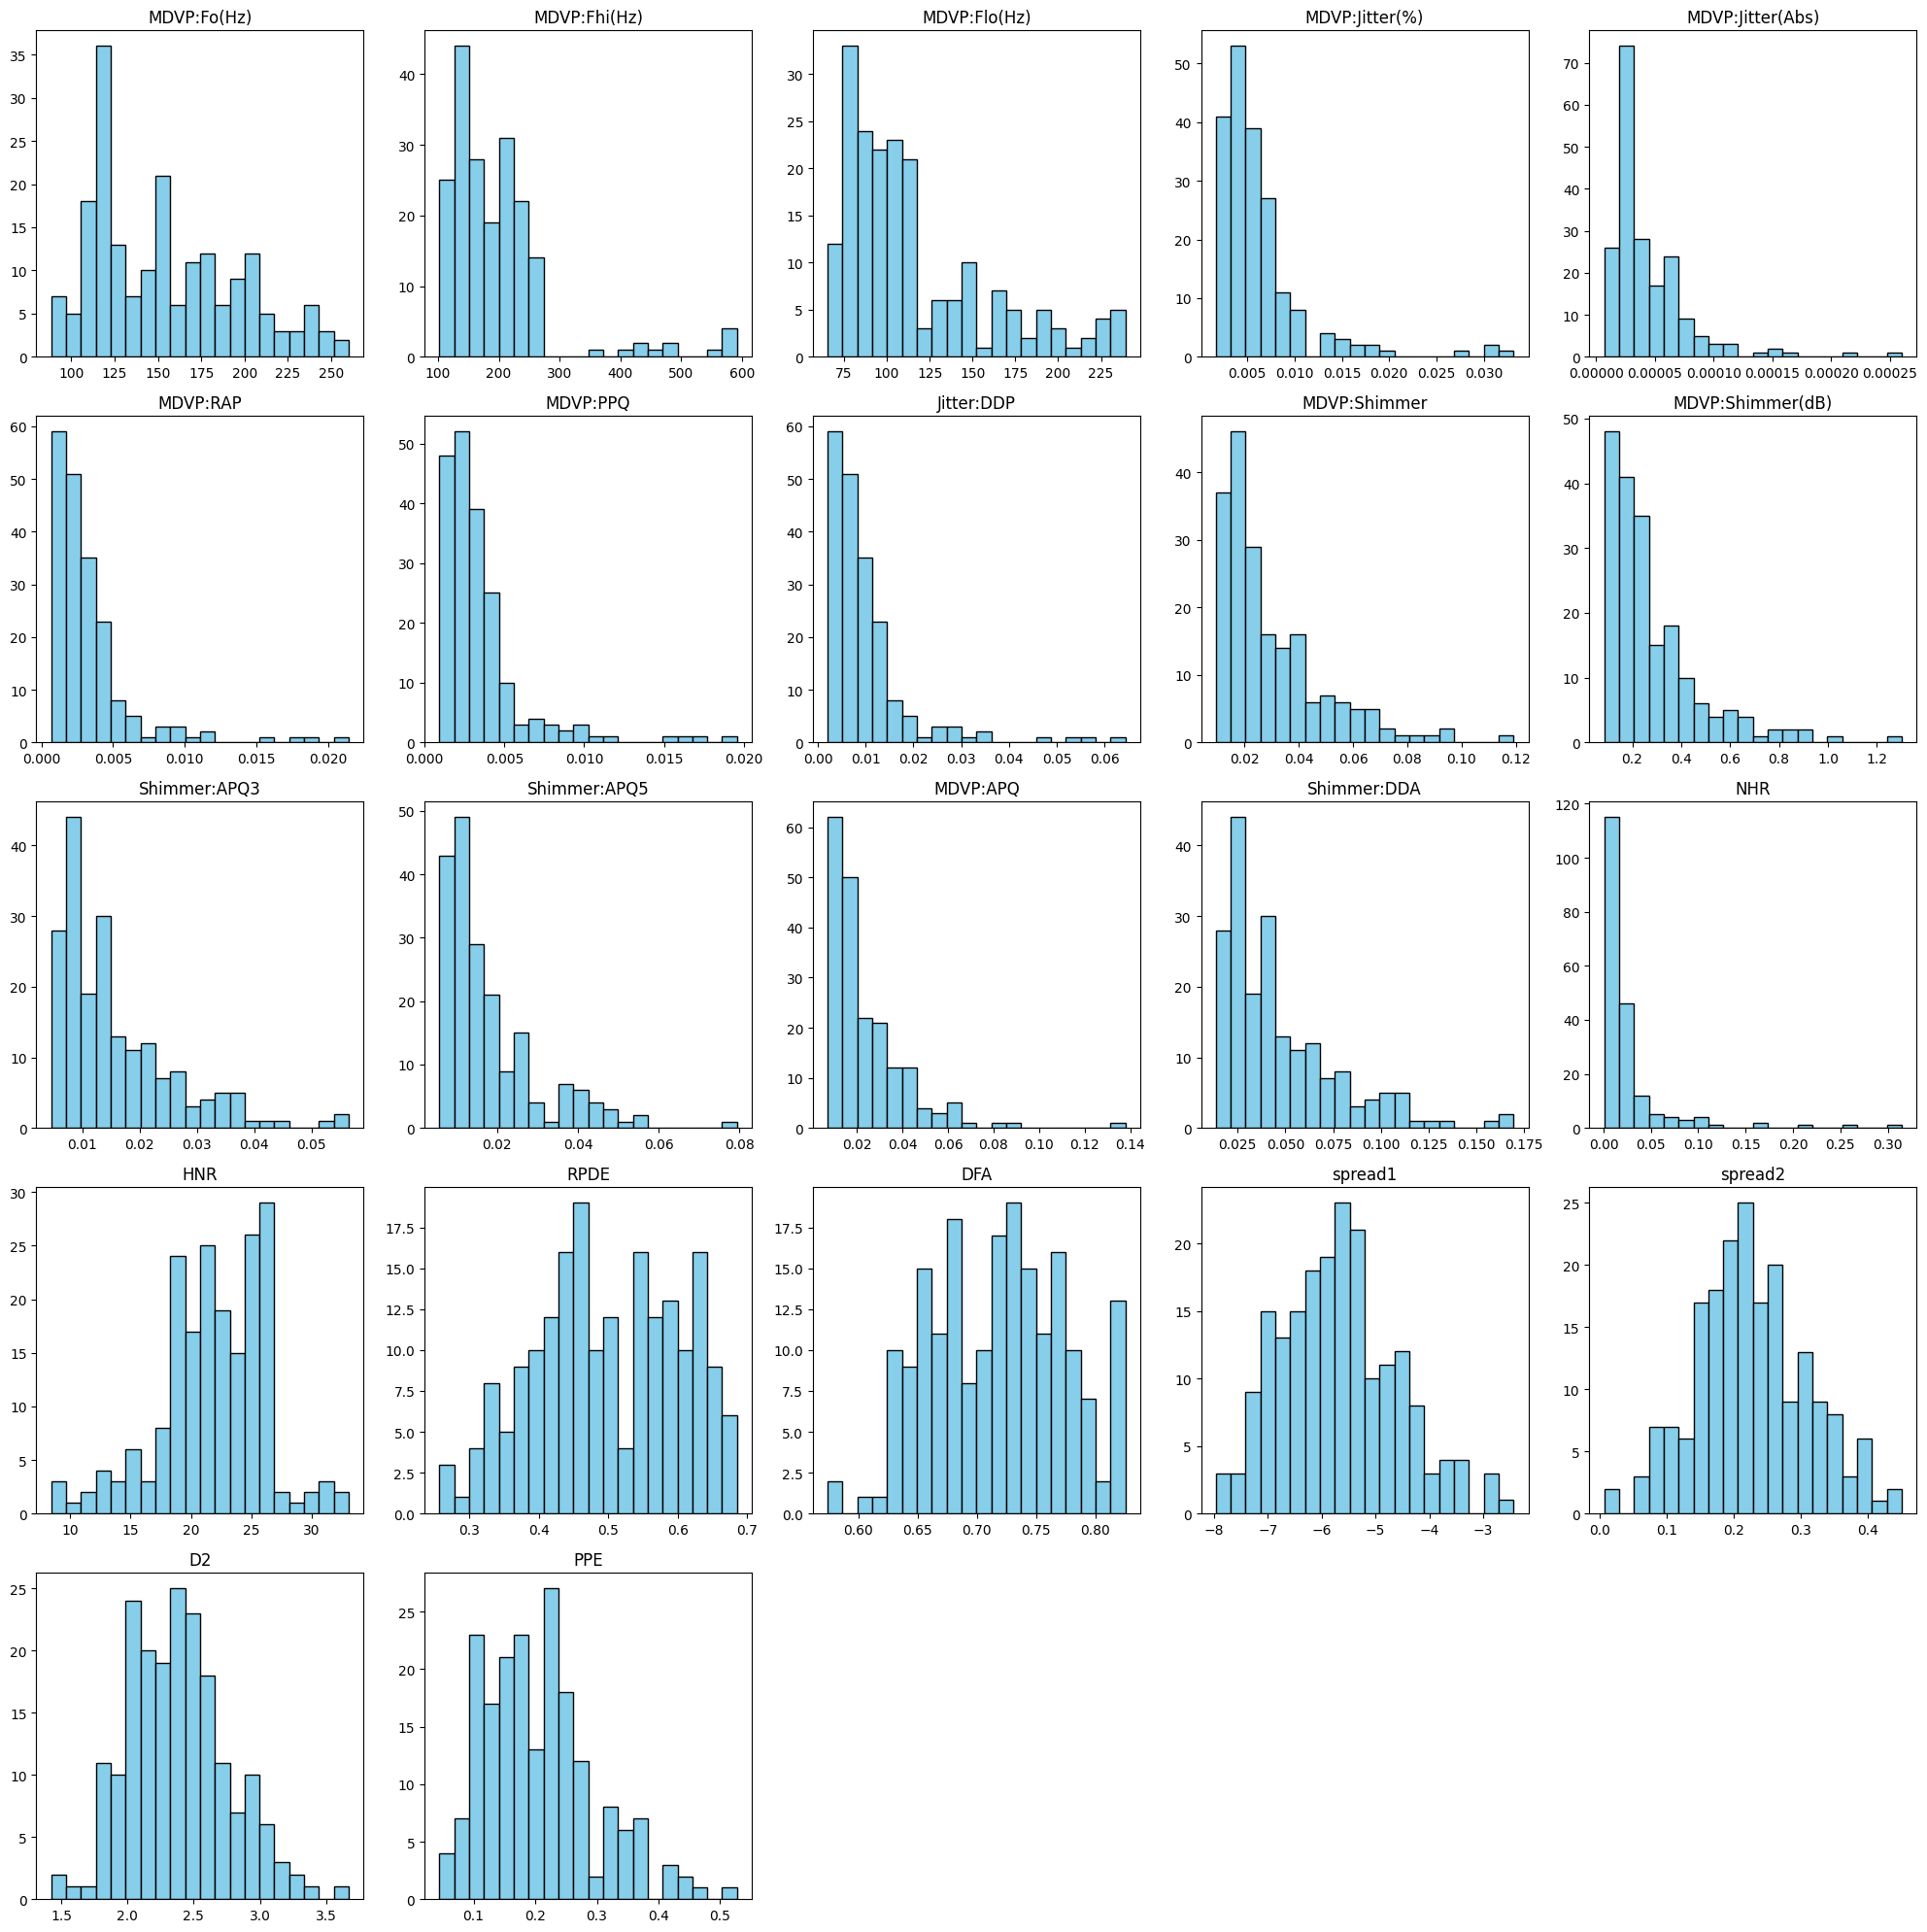

In [18]:
import matplotlib.pyplot as plt

num_features = len(X.columns)
num_rows = (num_features // 5) + (num_features % 5 > 0)
plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(X.columns):
    plt.subplot(num_rows, 5, i + 1)
    plt.hist(X[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()



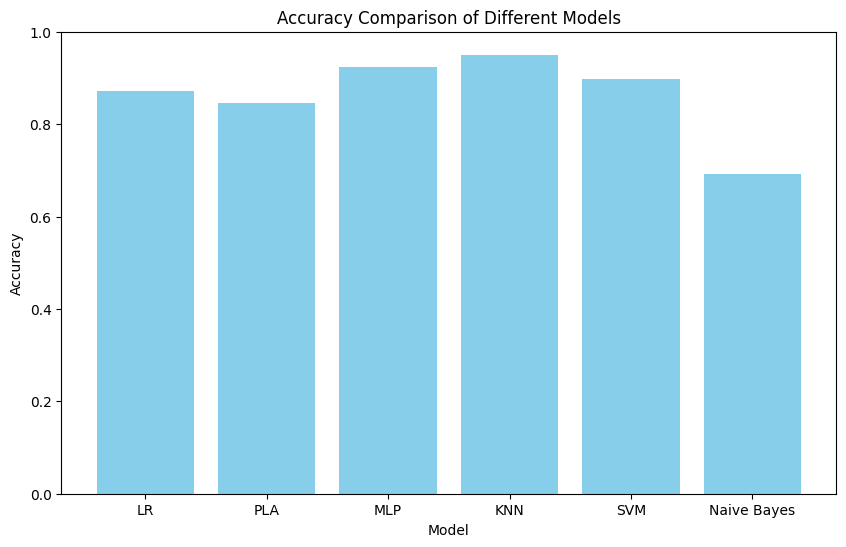

In [19]:
#interpreting the results obtained by different models
import matplotlib.pyplot as plt

# Define model names and corresponding accuracy scores
model_names = ['LR', 'PLA', 'MLP', 'KNN', 'SVM', 'Naive Bayes']
accuracy_scores = [accuracy_lr, accuracy_pla, accuracy_mlp, accuracy_knn, accuracy_svm, accuracy_nb]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


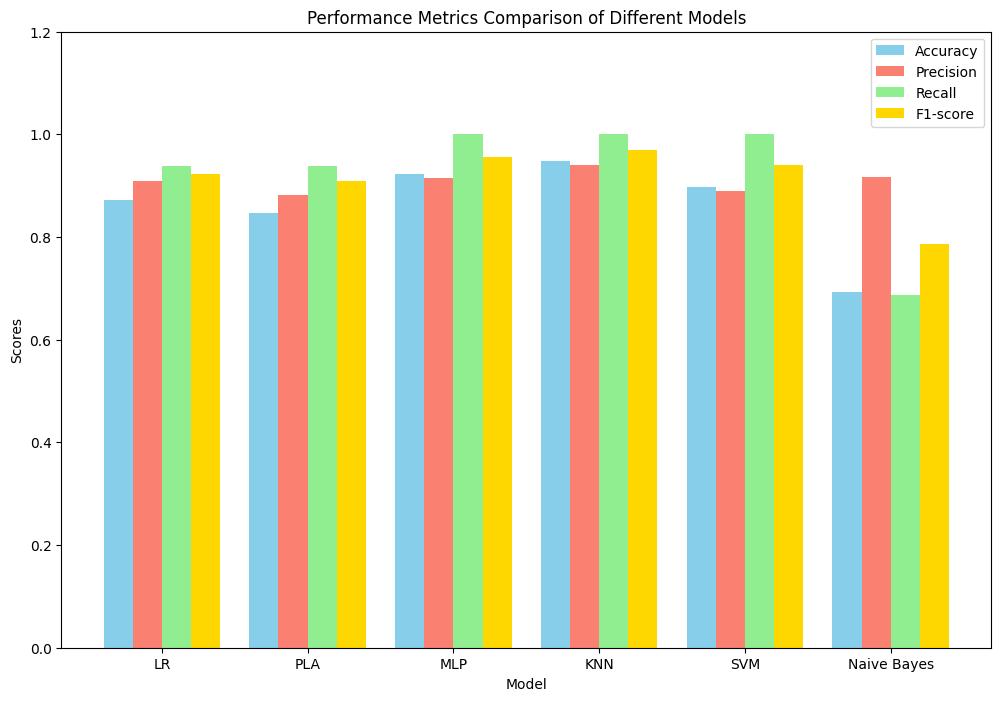

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_names = ['LR', 'PLA', 'MLP', 'KNN', 'SVM', 'Naive Bayes']
accuracy_scores = [accuracy_lr, accuracy_pla, accuracy_mlp, accuracy_knn, accuracy_svm, accuracy_nb]
precision_scores = [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_pla),
                    precision_score(y_test, y_pred_mlp), precision_score(y_test, y_pred_knn),
                    precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_nb)]
recall_scores = [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_pla),
                 recall_score(y_test, y_pred_mlp), recall_score(y_test, y_pred_knn),
                 recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_nb)]
f1_scores = [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_pla),
             f1_score(y_test, y_pred_mlp), f1_score(y_test, y_pred_knn),
             f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_nb)]


plt.figure(figsize=(12, 8))
bar_width = 0.2
index = range(len(model_names))

plt.bar(index, accuracy_scores, width=bar_width, color='skyblue', label='Accuracy')
plt.bar([i + bar_width for i in index], precision_scores, width=bar_width, color='salmon', label='Precision')
plt.bar([i + 2*bar_width for i in index], recall_scores, width=bar_width, color='lightgreen', label='Recall')
plt.bar([i + 3*bar_width for i in index], f1_scores, width=bar_width, color='gold', label='F1-score')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison of Different Models')
plt.xticks([i + 1.5*bar_width for i in index], model_names)
plt.legend()
plt.ylim(0, 1.2)
plt.show()

**INFERENCE:**

  from the first bar graph we can infer that KNN has the highest accuracy and thus we can conclude that KNN is best suitable model for the provided dataset.We can also notice that MLP also comes close to KNN in-terms of accuracy.Hence both KNN (more preferrabe) and MLP can be used for this dataset.




  